In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

Empezamos a importar las librerías que vamos a usar (muy similares al módulo anterior)


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Lectura del dataset y separación entre los datos independientes (predictores) y dependientes (target). Normalizado de datos y separación en training y testing:


In [4]:
df_heart = pd.read_csv("../data/heart.csv")

# Guardamos nuestro dataset sin la columna target
df_features = df_heart.drop(columns=["target"], axis=1)

# Este sera nuestro dataset, pero sin la columna
df_target = df_heart["target"]

# Normalizamos los datos
df_features = StandardScaler().fit_transform(df_features)

# Partimos nuestro dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df_features, df_target, test_size=0.3, random_state=42
)

Instanciamos a nuestro clasificador:


In [5]:
# Configuracion de la regresion logistica
logistic = LogisticRegression(solver="lbfgs", max_iter=1000)

Y aquí viene la única y principal diferencia respecto al código anterior, la instancia a PCA aplicado con Kernel.


In [6]:
# KPCA
# Alternativa a kernel, 'linear', 'poly', 'rbf', 'sigmoid', 'cosine', 'precomputed'
kpca = KernelPCA(n_components=4, kernel="poly")
kpca.fit(X_train)

KernelPCA(kernel='poly', n_components=4)

Recordemos que PCA NO es un clasificador, únicamente es una forma de reducir la dimensionalidad de nuestros datasets, sin embargo pese a no clasificar los datos, es necesario entrenarlo sobre nuestro conjunto de datos de entrenamiento. Una vez el modelo haya sido entrenado entonces puede ser utilizado para transformar a los datos de entrada de entrenamiento y validación y estos modelos ya transformados son los que usaremos en nuestro clasificador de cabecera.


In [7]:
# Configuracion de la regresion logistica con KPCA
df_train = kpca.transform(X_train)
df_test = kpca.transform(X_test)

Ya con los datos transformados por KPCA entonces podemos proceder a entrenar y evaluar a nuestro modelo:


In [8]:
# Entrenando algoritmo de KPCA
# Entrenamos la regresionb logistica con datos del KPCA
logistic.fit(df_train, y_train)

# Calculamos nuestra exactitud de nuestra prediccion
print("Score / Accuracy: ", logistic.score(df_test, y_test))

Score / Accuracy:  0.7987012987012987


In [11]:
kernel = ["linear", "poly", "rbf", "sigmoid", "cosine"]
for k in kernel:

    kpca = KernelPCA(n_components=4, kernel=k)  # kernel = linear / poly / rbf
    kpca.fit(X_train)
    dt_train = kpca.transform(X_train)
    dt_test = kpca.transform(X_test)
    logistic.fit(dt_train, y_train)
    print("SCORE KPCA " + k + " : ", logistic.score(dt_test, y_test))

SCORE KPCA linear :  0.8214285714285714
SCORE KPCA poly :  0.7987012987012987
SCORE KPCA rbf :  0.8181818181818182
SCORE KPCA sigmoid :  0.8246753246753247
SCORE KPCA cosine :  0.8246753246753247


I'm working on KPCA Linear
KPCA Linear with n_components=1 - Accuracy: 0.7694805194805194
KPCA Linear with n_components=2 - Accuracy: 0.7987012987012987
KPCA Linear with n_components=3 - Accuracy: 0.7857142857142857
KPCA Linear with n_components=4 - Accuracy: 0.8214285714285714
KPCA Linear with n_components=5 - Accuracy: 0.827922077922078
KPCA Linear with n_components=6 - Accuracy: 0.8181818181818182
KPCA Linear with n_components=7 - Accuracy: 0.8181818181818182
KPCA Linear with n_components=8 - Accuracy: 0.8181818181818182
KPCA Linear with n_components=9 - Accuracy: 0.8376623376623377
KPCA Linear with n_components=10 - Accuracy: 0.801948051948052
KPCA Linear with n_components=11 - Accuracy: 0.801948051948052
KPCA Linear with n_components=12 - Accuracy: 0.8051948051948052
KPCA Linear with n_components=13 - Accuracy: 0.8051948051948052

I'm working on KPCA Poly
KPCA Poly with n_components=1 - Accuracy: 0.788961038961039
KPCA Poly with n_components=2 - Accuracy: 0.7987012987012987
KPCA P

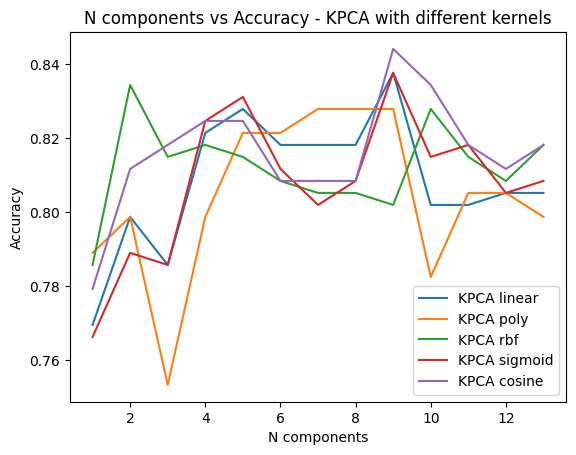

In [16]:
max_features = X_train.shape[1]
kpca_linear = {"accuracy": [], "n_components": []}
kpca_poly = {"accuracy": [], "n_components": []}
kpca_rbf = {"accuracy": [], "n_components": []}
kpca_sigmoid = {"accuracy": [], "n_components": []}
kpca_cosine = {"accuracy": [], "n_components": []}

print("I'm working on KPCA Linear")
for n in range(1, max_features + 1):
    kpca = KernelPCA(n_components=n, kernel="linear")
    kpca.fit(X_train)
    dt_train = kpca.transform(X_train)
    dt_test = kpca.transform(X_test)
    logistic.fit(dt_train, y_train)
    accuracy = logistic.score(dt_test, y_test)
    print(f"KPCA Linear with n_components={n} - Accuracy: {accuracy}")
    kpca_linear["accuracy"].append(accuracy)
    kpca_linear["n_components"].append(n)

print("\nI'm working on KPCA Poly")
for n in range(1, max_features + 1):
    kpca = KernelPCA(n_components=n, kernel="poly")
    kpca.fit(X_train)
    dt_train = kpca.transform(X_train)
    dt_test = kpca.transform(X_test)
    logistic.fit(dt_train, y_train)
    accuracy = logistic.score(dt_test, y_test)
    print(f"KPCA Poly with n_components={n} - Accuracy: {accuracy}")
    kpca_poly["accuracy"].append(accuracy)
    kpca_poly["n_components"].append(n)

print("\nI'm working on KPCA RBF")
for n in range(1, max_features + 1):
    kpca = KernelPCA(n_components=n, kernel="rbf")
    kpca.fit(X_train)
    dt_train = kpca.transform(X_train)
    dt_test = kpca.transform(X_test)
    logistic.fit(dt_train, y_train)
    accuracy = logistic.score(dt_test, y_test)
    print(f"KPCA RBF with n_components={n} - Accuracy: {accuracy}")
    kpca_rbf["accuracy"].append(accuracy)
    kpca_rbf["n_components"].append(n)

print("\nI'm working on KPCA Sigmoid")
for n in range(1, max_features + 1):
    kpca = KernelPCA(n_components=n, kernel="sigmoid")
    kpca.fit(X_train)
    dt_train = kpca.transform(X_train)
    dt_test = kpca.transform(X_test)
    logistic.fit(dt_train, y_train)
    accuracy = logistic.score(dt_test, y_test)
    print(f"KPCA Sigmoid with n_components={n} - Accuracy: {accuracy}")
    kpca_sigmoid["accuracy"].append(accuracy)
    kpca_sigmoid["n_components"].append(n)

print("\nI'm working on KPCA Cosine")
for n in range(1, max_features + 1):
    kpca = KernelPCA(n_components=n, kernel="cosine")
    kpca.fit(X_train)
    dt_train = kpca.transform(X_train)
    dt_test = kpca.transform(X_test)
    logistic.fit(dt_train, y_train)
    accuracy = logistic.score(dt_test, y_test)
    print(f"KPCA Cosine with n_components={n} - Accuracy: {accuracy}")
    kpca_cosine["accuracy"].append(accuracy)
    kpca_cosine["n_components"].append(n)

plt.plot(kpca_linear["n_components"], kpca_linear["accuracy"], label="KPCA linear")
plt.plot(kpca_poly["n_components"], kpca_poly["accuracy"], label="KPCA poly")
plt.plot(kpca_rbf["n_components"], kpca_rbf["accuracy"], label="KPCA rbf")
plt.plot(kpca_sigmoid["n_components"], kpca_sigmoid["accuracy"], label="KPCA sigmoid")
plt.plot(kpca_cosine["n_components"], kpca_cosine["accuracy"], label="KPCA cosine")
plt.title("N components vs Accuracy - KPCA with different kernels")
plt.xlabel("N components")
plt.ylabel("Accuracy")
plt.legend()
plt.show()